# SSENSE Spring Summer 2023 Sale Analysis (cont.)

<h3>This page consists mainly of graphs and charts regarding the dataset discussed from the previous notebook.</h3>

As a proof-of-concept, let's explore and try to answer some of the analysis questions presented in the previous notebook.


<h3>What type of item gets discounted by the highest percentage?</h3>
    

In [213]:
%run 'ssense_data_extraction.ipynb'

# finding the mean sale percentage of each item type, then listing in descending order
top10 = ssensesale_df.value_counts('type')[0:10]
top10 = list(top10.keys())
type_salepercent_df = ssensesale_df[['type', 'sale percent']]
type_salepercent_df = type_salepercent_df[type_salepercent_df['type'].isin(top10)]
type_salepercent_df = type_salepercent_df.groupby('type')['sale percent'].mean()
type_salepercent_df = type_salepercent_df.sort_values(ascending=False)
type_salepercent_df



type
Sweatshirt    45.622642
Sunglasses    44.622222
Jacket        43.500000
Hoodie        39.634921
Trousers      39.370370
Pants         39.320755
Sneakers      38.682692
Shirt         36.348837
T-Shirt       31.051613
Shorts        30.527778
Name: sale percent, dtype: float64

I filtered out items that have a small count, such as rings, due to the small sample size not being representative of the mean sale percentage of the entire item category in the SSENSE Sale. 

From <b>Figure 1</b> and the table shown, <b>sweatshirts</b> seems to be the most discounted items followed by <b>sunglasses</b> and <b>jackets</b>.


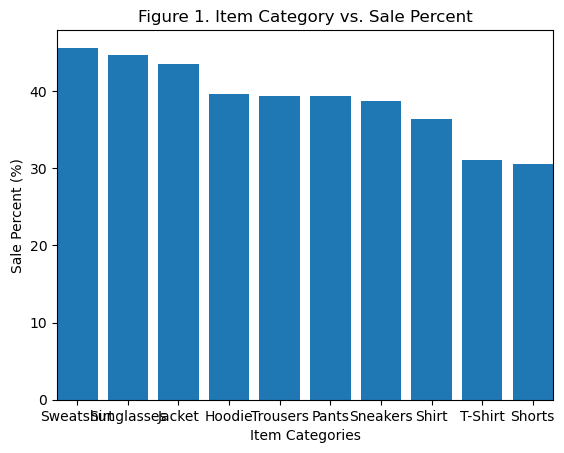

In [214]:
plt.bar(type_salepercent_df.keys(), type_salepercent_df)
plt.xlabel("Item Categories")
plt.ylabel("Sale Percent (%)")
plt.title("Figure 1. Item Category vs. Sale Percent")
plt.autoscale(enable=True, axis="x",tight=True)


<h3>Is there a correlation between the country of manufacture and the base price?</h3>

Analysis is continued below two cells. 

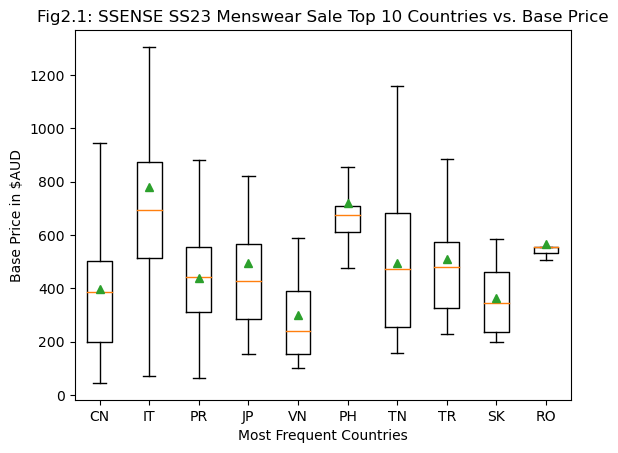

In [224]:
# superimpose distributions OR super impose box plots of countries vs. base price on same axes
country_baseprice_set = []
top10_countries = ssensesale_df.value_counts('country of origin')[0:10]
top10_countries = list(top10_countries.keys())

for country in top10_countries:
    country_data = ssensesale_df.loc[ssensesale_df['country of origin'] == country]
    country_data = list(country_data['base price'])
    country_baseprice_set.append(country_data)

# abbreviated version of top 10 countries for graph label
clean_top10 = ["CN", "IT", "PR", "JP", "VN", "PH", "TN", "TR", "SK", "RO"]


fig2 = plt.boxplot(country_baseprice_set, labels=clean_top10, showmeans=True, showfliers=False)
plt.xlabel("Most Frequent Countries")
plt.ylabel("Base Price in $AUD")
plt.title("Fig2.1: SSENSE SS23 Menswear Sale Top 10 Countries vs. Base Price")


Text(0.5, 1.0, 'Fig2.2: SSENSE SS23 Menswear Sale Top 10 Countries vs. Base Price with Outliers')

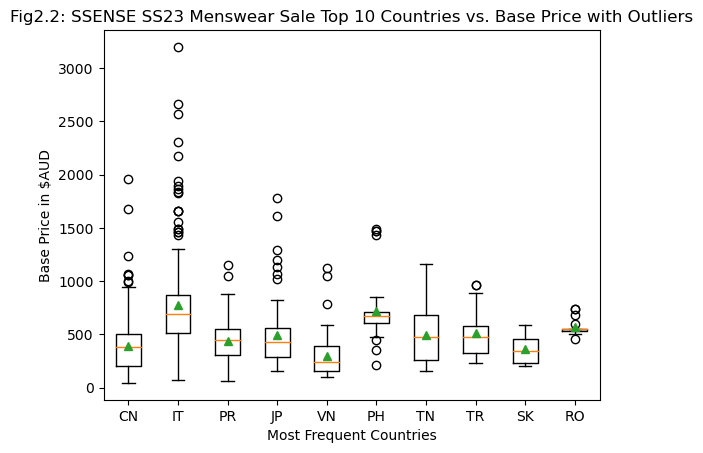

In [222]:
plt.boxplot(country_baseprice_set, labels=clean_top10, showmeans=True, showfliers=True)
plt.xlabel("Most Frequent Countries")
plt.ylabel("Base Price in $AUD")
plt.title("Fig2.2: SSENSE SS23 Menswear Sale Top 10 Countries vs. Base Price with Outliers")

If we had enabled outliers on the boxplots, it's evident that Italian-made clothing have fliers that go way beyond the already high averages. Moving past that, it still had the highest mean pricing of any other country, which confirms the commonly held belief that Italian made items are of higher ticket price than other countries. NOTE: French items were too few to construct a box plot. 

<h3>Wait, the Philippines?</h3><br>
What's interesting here is that the Philippines had an oddly high mean, almost higher than that of Italian made items. Further inpsection of the data revealed that it was mainly due to Homme Plissé Issey Miyake being made in the Philippines and consisting of bottoms and tops, and no accessories. 

Naturally, this graph would be evened out if we had examined more items that were manufactured in the Philippines to see a more comprehensive view. Unforunately, within this dataset there were none due to the prevalence of Homme Plisse Issey Miyake in the sale. Furthermore, based on industry knowledge, the Philippines is not a common country to produce luxury goods in the first place, so whether the "true" distribution will form after gaining a larger sample is called into question as well. 


The data from items made in the Philippines are as follows:

In [251]:
philippines_data = ssensesale_df.loc[ssensesale_df['country of origin'] == 'Philippines']
print("Brands that make items in the Philippines\n")
print(philippines_data.value_counts('brand'))

print("\nType of items made in the Philippines\n")
print(philippines_data.value_counts('type'))
print("\nNote: The Isabel Marant ring was the only accessory and other brand produced in the Philippines.")

Brands that make items in the Philippines

brand
Homme Plissé Issey Miyake    37
Isabel Marant                 1
dtype: int64

Type of items made in the Philippines

type
Trousers      22
T-Shirt        5
Blazer         4
Cardigan       2
Shirt          2
Turtleneck     2
Ring           1
dtype: int64

Note: The Isabel Marant ring was the only accessory and other brand produced in the Philippines.


<h3>Italy: Higher or Lower?</h3><br>
However, it is interesting to notice that Italian items have a very high number of outliers and for some reason they were not included as values within the box plot itself. 

Italian-made items do consist of a large amount of accessories, and at first glance, it seems like common sense to try and pinpoint the reason for a lower average base price to these accessories bringing the mean price down. Furthermore, the proportion of these accessories over the overall types of items on sale will inevitably cause the matplotlib library to identify the higher-priced items as outliers.

For future considerations, these outliers should be considered within range of the box plot function with a larger sample size such as the general SSENSE catalogue. However, let's entertain this idea for the sake of this project. 

The common conception is that accessories are typically lower-priced than full clothing items. Let's test that conception now, where the most popular accessories being cardholders and sunglasses.

In [263]:
italian_data = ssensesale_df.loc[ssensesale_df['country of origin'] == 'Italy']
print("The counts of all the item types made in Italy:\n")
print(italian_data.value_counts('type'))
print("\nNote: Holder here refers to cardholders.\n")

italian_cardholders = italian_data.loc[italian_data['type'] == 'Holder']
italian_sunglasses = italian_data.loc[italian_data['type'] == 'Sunglasses']
print("The average price of Italian sunglasses in the Menswear Sale ($AUD):")
print(italian_sunglasses['base price'].mean())
print("\nThe average price of Italian cardholders in the Menswear Sale ($AUD):")
print(italian_cardholders['base price'].mean())

The counts of all the item types made in Italy:

type
Sunglasses    29
Holder        21
Sneakers      21
T-Shirt       16
Ring          10
Slides         9
Belt           8
Necklace       8
Wallet         8
Jeans          6
Bracelet       6
Jacket         5
Glasses        4
Hoodie         4
Socks          4
Trousers       4
Shorts         3
Pants          3
Polo           3
Pouch          3
Scarf          3
Sweatshirt     2
Tote           2
Bag            2
Shirt          2
Earrings       2
Earring        2
Slippers       1
Mules          1
Loafers        1
Sweater        1
Derbys         1
Coat           1
Cardigan       1
Plimsoll       1
dtype: int64

Note: Holder here refers to cardholders.

The average price of Italian sunglasses in the Menswear Sale ($AUD):
698.3448275862069

The average price of Italian cardholders in the Menswear Sale ($AUD):
443.14285714285717


Finally, let's compare the average price of Italian-made items versus these accessories: 

In [250]:
print("The average price of Italian made items in the Menswear Sale ($AUD):")
print(italian_data['base price'].mean())

The average price of Italian made items in the Menswear Sale ($AUD):
780.7222222222222


So it does turn out that the average prices of the two most produced items from Italy (in the Menswear Sale) do have a lower average than just the average price of all Italian-made items. 

You might think that the sunglasses and cardholders contributed an abnormally large proportion of all the items made in Italy (roughly 25%). However, I should emphasise here that the dataset is obtained from the <b>SSENSE Menswear Sale</b> section. The bar chart from above where sunglasses were the second most discounted item suggests the possibility that accessories are slower-moving stock, so it could be a possibility that this mean price is actually pretty representative of the Italian-made items' average price. 

However, currently sunglasses and cardholders consists of a smaller proportion of the whole sample than actual clothing items, which also appeals to our common sense. To add more fire to the fuel, if we had included the outliers as shown from Fig2.2, it would put some degree of weight onto the idea that these items could hide the "true" average price of Italian items as being higher.

So, what now? The most ideal way to verify both of the statements I brought up above, whilst increasing the accuracy of this graph would be to obtain a larger sample size from the SSENSE catalogue, both sale and regular season. This way our box plot can construct a plot that includes what were previously outliers, as well as verifying whether the proportion of accessories is a true representation of the population proportion, or if it is due to the increased likelihood of accessories appearing in the Sale section. 

In [266]:
itemtypes_ssensesale = ssensesale_df.value_counts('type')
print("The total unique entries are 1006 items. Below is the number of sunglasses and cardholders:\n")
print(itemtypes_ssensesale.loc[['Sunglasses', 'Holder']])

The total unique entries are 1006 items. Below is the number of sunglasses and cardholders:

type
Sunglasses    45
Holder        23
dtype: int64


<h3>More Soon... </h3>

These are just some preliminary tests I wanted to explore and experiment with, and hope to gain some insight into how the SSENSE SS23 Meanswear Sale operated, and if there were any patterns that had/could come up. Also, I thought it would be a good way to familiarise myself with the libraries Pandas, Matplotlib, Pathlib and BeautifulSoup, along with just vanilla Python. 

Other than finding the interesting data behind which items were discounted by the largest percentage, I did find some affirmation to commonly held consumer-beliefs, mainly being that "Made in Italy" still carries a lot of weight, in terms of ticket pricing compared to other countries. In terms of the actual "true" average however, this does come with some refinement needed, as the data might not be representative due to the large proportion of accessories, or the small sample size obtained for Italian-made items. 

In addition, I explored as to why exactly the Philippines had an abnormally high average base price and found that it was due to the majority of items being from Homme Plisse Issey Miyake, and that they were mostly "full" clothing items like trousers, tops and outerwear. 

There will be revisions made to these notebooks to improve the dataset itself in terms of detail and quality, and the other questions will be explored in due time. (once I have more time...) 

<h3>by Richard Ha</h3>